<a href="https://colab.research.google.com/github/fucc-it/GoogleColab_Yolov4_XRAY/blob/main/Version1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import os
from google.colab.patches import cv2_imshow
import numpy as np
import argparse

In [3]:
class YoloNet:

  def __init__(self, config, weight, labels):
    self.config = config
    self.weight = weight
    self.labels = open(labels).read().strip().split("\n")
    self.COLORS = np.random.uniform(0, 255, size=(len(labels), 3))
    self.cords = []

  def start_net(self):
    self.net = cv2.dnn.readNet(self.weight, self.config)

  def work(self, img):
    self.image = cv2.imread(img)
    Width = self.image.shape[1]
    Height = self.image.shape[0]
    scale = 0.00392
    blob = cv2.dnn.blobFromImage(self.image, scale, (416,416), (0,0,0), True, crop=False)

    self.net.setInput(blob)

    def get_output_layers(net):
      layer_names = net.getLayerNames()
      output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
      return output_layers
    def draw_bounding_box(img, class_id, confidence, x, y, x_plus_w, y_plus_h):
      label = str(self.labels[class_id])
      color = self.COLORS[class_id]
      cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 2)
      cv2.putText(img, label, (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    outs = self.net.forward(get_output_layers(self.net))
    class_ids = []
    confidences = []
    boxes = []
    conf_threshold = 0.5
    nms_threshold = 0.4
    for out in outs:
      for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        center_x = int(detection[0] * Width)
        center_y = int(detection[1] * Height)
        w = int(detection[2] * Width)
        h = int(detection[3] * Height)
        x = center_x - w / 2
        y = center_y - h / 2
        class_ids.append(class_id)
        confidences.append(float(confidence))
        boxes.append([x, y, w, h])
    indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)
    
    for i in indices:
      i = i
      box = boxes[i]
      self.cords.append(box)
      x = box[0]
      y = box[1]
      w = box[2]
      h = box[3]
      draw_bounding_box(self.image, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))
    cv2_imshow(self.image)
    
  def return_cords(self):
    return(self.cords)


In [56]:
class DetectDelta():

  def __init__(self, cords):

    self.cords = cords
    self.cords_left = []
    self.cords_right = []
    self.cords_array = []

  def unpuc_cords(self):

    def simple_math(x1, x2, y2, w1, h2):
      b1 = (x1 + w1/2)
      b2 = (y2 + h2)
      d1 = x2
      d2 = (y2 + h2)
      a = ((d1 - b1) ** 2) + ((d2 - b2) ** 2)
      delta = np.sqrt(a)
      return(delta)

    for i in range(len(self.cords)):
      if 1 == 0 or i%2 == 0:
        x1 = self.cords[i][0]
        x2 = self.cords[i+1][0]
        y1 = self.cords[i][1]
        y2 = self.cords[i+1][1]
        w1 = self.cords[i][2]
        w2 = self.cords[i+1][2]
        h1 = self.cords[i][3]
        h2 = self.cords[i+1][3]
        self.cords_array.append(simple_math(x1, x2, y2, w1, h2))
        return(simple_math(x1, x2, y2, w1, h2))

  def MaxDelta(self):
    limitMax = max(self.cords_array)
    return(limitMax)

In [48]:
configs = '/content/drive/MyDrive/YoloV4/yolov4-obj.cfg'
weights ='/content/drive/MyDrive/YoloV4/backup/yolov4-obj_final.weights'
labels = '/content/drive/MyDrive/YoloV4/obj.names'

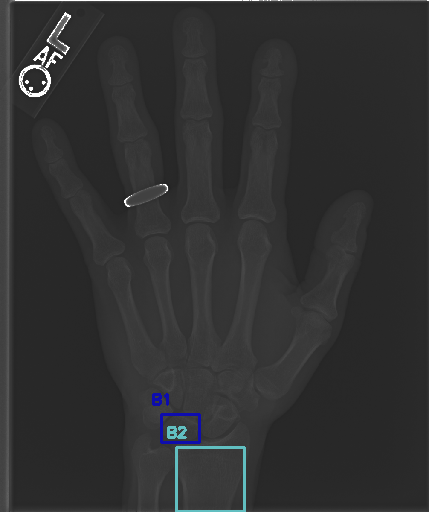

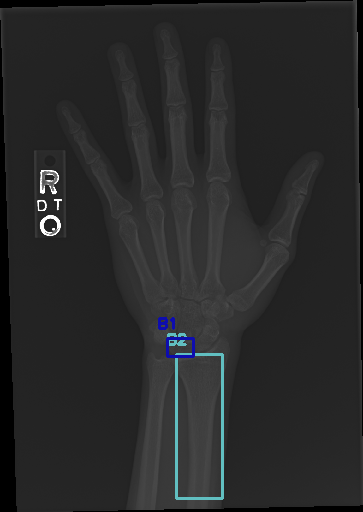

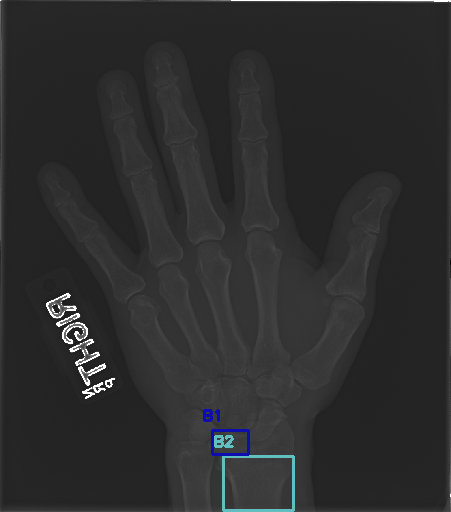

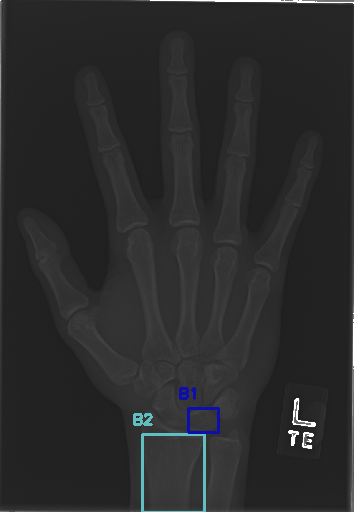

In [57]:
research_health_hand = YoloNet(configs, weights, labels)
research_health_hand.start_net()

for i in range(4):
  image = ('/content/drive/MyDrive/YoloV4/valid/'+ str(i+1)+'.png')
  research_health_hand.work(image)

research_max_delta = DetectDelta(research_health_hand.return_cords())
research_max_delta.unpuc_cords()
max_delta = research_max_delta.MaxDelta()

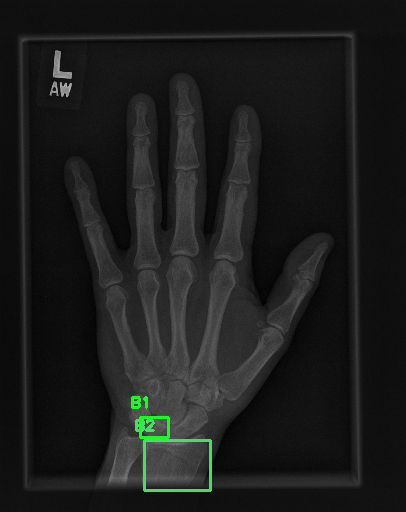

Все ок


In [58]:
check_health = YoloNet(configs, weights, labels)
check_health.start_net()

####################################################
image_test = '/content/drive/MyDrive/YoloV4/1.png'
####################################################

check_health.work(image_test)

check_delta = DetectDelta(check_health.return_cords())
if check_delta.unpuc_cords() > max_delta:
  print('Руки из жопы')

elif check_delta.unpuc_cords() < max_delta:
  print('Все ок')

